# The present value of asset supply elasticities

In [1]:
import Pkg; Pkg.activate(joinpath(@__DIR__, ".."))
using Revise
using MicroRisks
using ProgressMeter
using LaTeXStrings
using Roots
using CairoMakie
using Polyester

ProgressMeter.ijulia_behavior(:clear);

  Activating project at `~/Github/micro_risks`


In [2]:
# Household
h = let 
    ar1 = 0.9695
    sigmaP = sqrt(0.0384)/(1.2)
    sigmaIID = sqrt(0.0522)/(1.2)
    P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

    ies = 1
    crra = 5.5
    β = 0.993
    u = EZ(ies = ies, ra = crra, β = β)
    v = GHH(θ = 1.0, ν = 0.2)
    Household(u = u, a_grid = grid(; stop = 10.0, length = 500),
        v = v, P = P, z_grid = z_vals)
end

EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..10.000000000000004

In [3]:
# Technology
t = let
    δ = 0.1
    A = 0.2
    α = 0.3
    μ = 1.4
    CobbDouglasTechnology(α = α, A = A^((1 - α)), δ = δ, μ = μ)
end

α=0.3, A=0.32413131933855255, δ=0.1

In [4]:
@time e_init = stationary_laissez_faire(h, t; r_range = (-0.02, 0.0), verbose = false)

 32.155302 seconds (9.17 M allocations: 721.950 MiB, 0.91% gc time, 13.92% compilation time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..10.000000000000004, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.01699696069678158, w=0.15015100341943477, T=0.0, a=0.5601165104689341, k=0.5601165047315453, b=0.0, n=0.7224718192241157

In [5]:
@time jac = jacobian_column(1:50:500, e_init; cap_t = 500, cap_s = 500, ΔR = 1e-4, ΔT = 0.0);

  4.649648 seconds (2.15 M allocations: 410.346 MiB, 1.90% gc time, 25.36% compilation time)


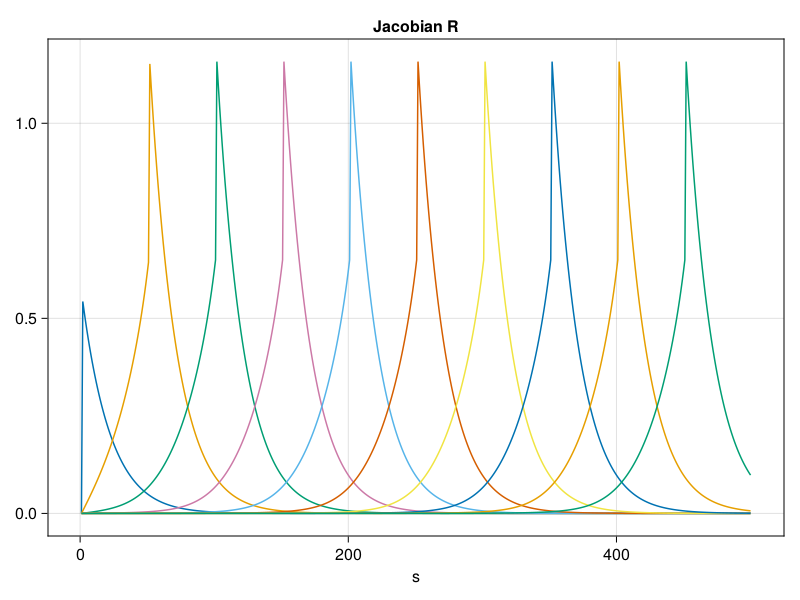

In [6]:
let
    fig = Figure() 
    ax = Axis(fig[1, 1], xlabel = "s", title = "Jacobian R")
    for col in jac
        lines!(ax, col) 
    end
    fig
end

In [7]:
@time jac_T = jacobian_column(1:50:500, e_init; cap_t = 500, cap_s = 500, ΔR = 0.0, ΔT = 1e-4);

  3.403286 seconds (32.04 k allocations: 268.910 MiB, 1.48% gc time)


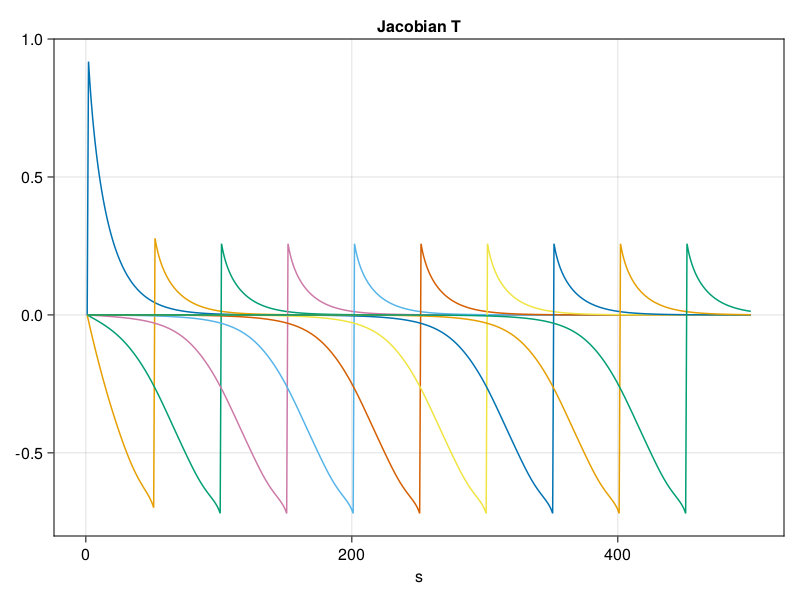

In [8]:
let
    fig = Figure() 
    ax = Axis(fig[1, 1], xlabel = "s", title = "Jacobian T")
    for col in jac_T
        lines!(ax, col) 
    end
    fig
end

In [9]:
@time pvs = pv_elasticities(1:20:500, e_init; cap_s = 500, cap_t = 2000);

 18.277303 seconds (812.30 k allocations: 1.088 GiB, 2.16% gc time, 1.47% compilation time)


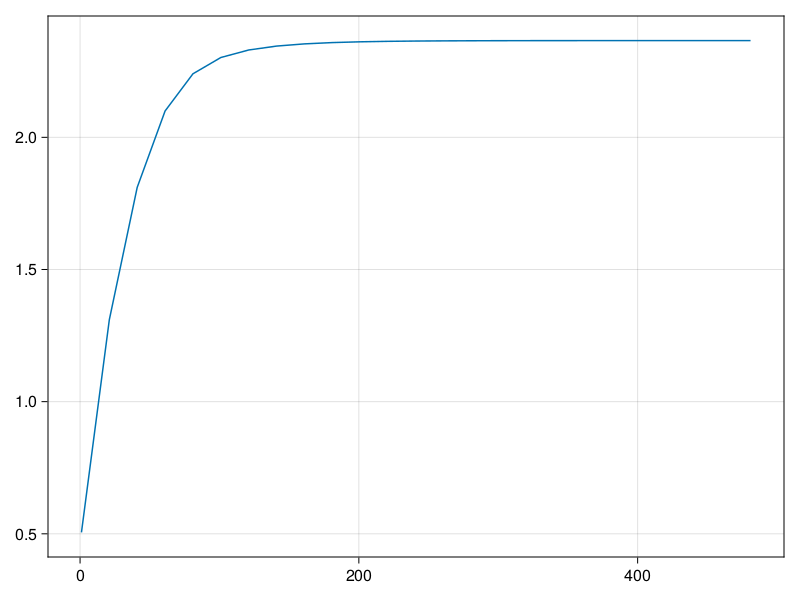

In [10]:
lines(1:20:500, pvs, title = "PV Formula for different s", xlabel = "s")